# Proyek Analisis Data: Bike sharing
- **Nama:** Christoforus Stanislaus
- **Email:** christoforusstanislaus11@gmail.com
- **ID Dicoding:** christoforus

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah pengguna sepeda casual, registered dan total pada 2 tahun tersebut, serta kebiasaan pengguna casual dan registered?
- Bagaimana faktor eksternal (temperatur, kelembapan, kecepatan angin) memengaruhi jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [138]:
day_df = pd.read_csv("day.csv") # Di sini dilakukan pembacaan day.csv dengan pandas module
day_df.head() # memunculkan 5 baris paling atas dari file day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [139]:
hour_df = pd.read_csv("hour.csv") # pembacaan data hour.csv dengan pandas module
hour_df.head() # menampilkan 5 baris teratas dari hour.csv

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Di sini kita dapat memanggil data dalam bentuk csv

### Assessing Data

**Asess data day.csv**

In [140]:
day_df.info() # mendapatkan info seperti dtype dari masing-masing kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [141]:
day_df.isna().sum() # melihat apakah terdapat mising value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [142]:
print("Jumlah duplikasi: ", day_df.duplicated().sum()) # menampilkan jumlah duplikasi dalam data

Jumlah duplikasi:  0


In [143]:
day_df.describe() # menampilkan statistik dari masing masing kolom

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dapat dilihat bahwa semua jumlah di day.csv memiliki angka yang sama dengan kata lain tidak terdapat missing value. Di sisi lain, terdapat kesalahan datatype untuk dtetime. Pada data day.csv ini juga tidak terdapat data duplikat. Jika dilihat saat menggunakan describe, dapat diperhatikan bahwa data yang tersedia dapat dikategorikan baik.
- Dengan demikian, pada data day.csv ini sudah baik sehingga tidak diperlukanya melakukan dropping atau interpolasi kecuali untuk mengganti datatype dari dtetime

**Asess data hour.csv**

In [144]:
hour_df.info() # menampilkan info dtype dari tiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [145]:
hour_df.isna().sum() # menampilkan jumlah missing values pada setiap kolom

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [146]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum()) # menampilkan jumlah duplikasi dalam data

Jumlah duplikasi:  0


In [147]:
hour_df.describe() # menampilkan statistik pada setiap kolomnya

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [148]:
date_counts = hour_df['dteday'].value_counts()
date_counts[date_counts < 24] # menampilkan semua hari yang memiliki data kurang dari 24 jam

,count
dteday,
2011-01-05,23
2011-02-09,23
2011-10-19,23
2011-01-06,23
2012-11-29,23
...,...
2011-01-26,16
2011-01-18,12
2012-10-30,11


**Insight:**
- Dapat dilihat bahwa sama seperti day.csv,  hour.csv memiliki jumlah(count) data yang sama untuk setiap datanya dan tidak terdapat missing value. Di sisi lain, terdapat kesalahan datatype untuk dtetime. Pada data hour.csv ini juga tidak terdapat data duplikat. Jika dilihat jumlah count pada setiap harinya, ada beberapa hari yang memiliki jumlah count dibawah 24, ini berarti ada beberapa hari yang tidak mencakup penuh waktunya. Karena cakupan waktunya harusnya 24 jam maka akan terdapat 24 anggota yaitu (0, 1, 2, ..., 23) dengan 0 mencakup pukul 00.00 - 00.59, lalu 1 mencakup pukul 01.00 - 01.59, dst.
- Dengan demikian, pada data hour.csv dapat dilakukan dropping untuk beberapa hari yang kurang data

### Cleaning Data

**Penggantian data type, penggantian angka pada normalized number pada day_df**


In [149]:
day_df.info() # menampilkan info dtype data day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [150]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) # mengganti dtype dteday dari object menjadi datetime

In [151]:
day_df.info() # menampilkan info dari day_df yang telah terupdate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [152]:
# melakukan pengalian data menjadi readable data.
# karena data yang tersedia merupakan data normalized, maka untuk temp, atemp, hum, windsped dikembalikan menjadi skala semula
# sedangkan untuk season diganti dari nomor 1-4 menjadi nama musim yang berkesesuaian
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67
day_df['season'] = day_df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [153]:
day_df.head(10) # menampilkan 10 baris paling atas dari data day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Springer,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Springer,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,Springer,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,Springer,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,Springer,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Penggantian data type,drop data dan penggantian normalized number pada hour_df**

In [154]:
hour_df.info() # menampilkan info dari hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [155]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday']) # melakukan penggantian datatype dteday dari object menjadi datetime

In [156]:
# menghitung jumlah count pada setiap harinya
date_counts = hour_df['dteday'].value_counts()

# menyimpan index saat count hari tersebut kurang dari 24
dates_to_drop = date_counts[date_counts < 24].index

# karena kurang dari 24, berarti data yang tersedia kurang dari 24 jam, maka dilakukan drop untuk hari-hari tersebut
hour_df = hour_df[~hour_df['dteday'].isin(dates_to_drop)]

In [157]:
hour_df.info() # menampilkan info data yang telah diupdate

<class 'pandas.core.frame.DataFrame'>
Index: 15720 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     15720 non-null  int64         
 1   dteday      15720 non-null  datetime64[ns]
 2   season      15720 non-null  int64         
 3   yr          15720 non-null  int64         
 4   mnth        15720 non-null  int64         
 5   hr          15720 non-null  int64         
 6   holiday     15720 non-null  int64         
 7   weekday     15720 non-null  int64         
 8   workingday  15720 non-null  int64         
 9   weathersit  15720 non-null  int64         
 10  temp        15720 non-null  float64       
 11  atemp       15720 non-null  float64       
 12  hum         15720 non-null  float64       
 13  windspeed   15720 non-null  float64       
 14  casual      15720 non-null  int64         
 15  registered  15720 non-null  int64         
 16  cnt         15720 non-null 

In [158]:
# melakukan pengalian data menjadi readable data.
# karena data yang tersedia merupakan data normalized, maka untuk temp, atemp, hum, windsped dikembalikan menjadi skala semula
# sedangkan untuk season diganti dari nomor 1-4 menjadi nama musim yang berkesesuaian
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67
hour_df['season'] = hour_df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

<ipython-input-158-e13cc52dc5f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['temp'] = hour_df['temp'] * 41
<ipython-input-158-e13cc52dc5f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['atemp'] = hour_df['atemp'] * 50
<ipython-input-158-e13cc52dc5f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [159]:
hour_df.head(10) # menampilkan 10 data teratas dari data hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,6,2011-01-01,Springer,0,1,5,0,6,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,7,2011-01-01,Springer,0,1,6,0,6,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,8,2011-01-01,Springer,0,1,7,0,6,0,1,8.20,12.880,86.0,0.0000,1,2,3
8,9,2011-01-01,Springer,0,1,8,0,6,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,10,2011-01-01,Springer,0,1,9,0,6,0,1,13.12,17.425,76.0,0.0000,8,6,14


**Insight:**
- Karena adanya kesalahan klasifikasi data type, maka pada proses cleaning ini saya mengganti data type dari datetime yang awalnya object diubah menjadi datetime
- Lalu melakukan drop untuk beberapa hari di hour.csv yang mempunyai data kurang dari 24 jam

## Exploratory Data Analysis (EDA)

### Explore day_df

In [160]:
day_df.sample(5) # menampilkan 5 random sample dari day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,Winter,1,10,0,1,1,3,18.040000,21.97000,88.0000,23.999400,2,20,22
471,472,2012-04-16,Summer,1,4,1,1,0,1,27.230847,30.74625,56.1667,19.083543,1198,5172,6370
599,600,2012-08-22,Fall,1,8,0,3,1,1,27.367500,31.09270,67.7083,4.708981,1094,6281,7375
165,166,2011-06-15,Summer,0,6,0,3,1,1,25.693347,29.38770,47.1667,11.250104,769,4411,5180
235,236,2011-08-24,Fall,0,8,0,3,1,1,27.606653,31.53460,60.5000,16.958236,949,4181,5130


In [161]:
day_df.describe(include="all") # menampilkan statistik dari tiap kolom pada day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Bining berdasarkan hari holiday atau tidak**

In [162]:
# menampilkan pengelompokan jumlah user saat libur dan saat tidak libur
day_df.groupby(by="holiday").agg({"casual" : 'sum', "registered" : 'sum', "cnt" : 'sum', 'dteday':'count'})

# terlihat hanya terdapat 21 hari holiday dengan 78 ribu pengguna, dengan kata lain rata-rata dari pengguna tiap harinya pada hari libur jauh
# lebih sedikit jika dibandingkan dengan rata-rata pengguna harian pada hari non libur.

,casual,registered,cnt,dteday
holiday,,,,
0,597658,2616586,3214244,710
1,22359,56076,78435,21


**Bining berdasarkan musim**



In [163]:
day_df.groupby(by="season").agg({"casual" : 'sum', "registered" : 'sum', "cnt" : 'sum'})
# menampilkan jumlah pengguna pada setiap musimnya

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


**Bining berdasarkan temp**



In [164]:
day_df.groupby(pd.cut(day_df['temp'], bins=10)).agg({"cnt": "sum"})
# menampilkan jumlah pengguna pada interval suhu yang berbeda

<ipython-input-164-cff353a9b483>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(pd.cut(day_df['temp'], bins=10)).agg({"cnt": "sum"})


,cnt
temp,
"(2.391, 5.715]",9707
"(5.715, 9.005]",57853
"(9.005, 12.296]",250141
"(12.296, 15.586]",361350
"(15.586, 18.876]",378145
"(18.876, 22.167]",415198
"(22.167, 25.457]",541617
"(25.457, 28.748]",559325
"(28.748, 32.038]",594713


**Mengurutkan berdasarkan 10 hari dengan count total rental terbanyak**

In [165]:
day_df.sort_values(by='cnt', ascending=False).head(10)
# menampilkan 10 hari dengan total pengguna terbanyak dari data day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,Fall,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
637,638,2012-09-29,Winter,1,9,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
630,631,2012-09-22,Fall,1,9,0,6,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
447,448,2012-03-23,Summer,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
504,505,2012-05-19,Summer,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,8294
617,618,2012-09-09,Fall,1,9,0,0,0,1,25.010000,28.94625,54.7500,15.041232,2570,5657,8227
571,572,2012-07-25,Fall,1,7,0,3,1,1,29.690847,32.70270,45.0000,11.041600,1383,6790,8173
629,630,2012-09-21,Fall,1,9,0,5,1,1,24.565847,28.59855,66.8750,10.333343,1250,6917,8167
643,644,2012-10-05,Winter,1,10,0,5,1,1,25.215000,29.00935,62.7500,7.125450,1516,6640,8156
518,519,2012-06-02,Summer,1,6,0,6,0,1,23.916653,28.31440,54.9167,12.499654,2795,5325,8120


**Melakukan clustering untuk data temp, hum, windspeed dengan Manual grouping**

In [166]:
# mendefinisikan grup temperatur
def temperature_group(temp):
    if temp < 10:
        return 'Dingin'
    elif temp < 25:
        return 'Sedang'
    else:
        return 'Panas'

# mendefinisikan grup kelembapan
def humidity_group(hum):
    if hum < 40:
        return 'rendah'
    elif hum < 60:
        return 'sedang'
    else:
        return 'tinggi'

# mendefinisikan grup kecepatan angin
def windspeed_group(windspeed):
    if windspeed < 10:
        return 'tenang'
    elif windspeed < 20:
        return 'semilir'
    else:
        return 'berangin'

# menambahkan kolom ke day_df
day_df['temp_group'] = day_df['temp'].apply(temperature_group)
day_df['hum_group'] = day_df['hum'].apply(humidity_group)
day_df['windspeed_group'] = day_df['windspeed'].apply(windspeed_group)

group_stats = day_df.groupby(['temp_group', 'hum_group', 'windspeed_group']).agg(
    {'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'}
)
print(group_stats)

                                           casual   registered          cnt
temp_group hum_group windspeed_group                                       
Dingin     rendah    semilir           123.000000  1562.000000  1685.000000
           sedang    berangin           59.714286  1401.428571  1461.142857
                     semilir           153.296296  1720.444444  1873.740741
                     tenang            149.166667  1707.666667  1856.833333
           tinggi    berangin            9.000000   432.000000   441.000000
                     semilir           105.166667  1304.666667  1409.833333
                     tenang             97.416667  1412.666667  1510.083333
Panas      rendah    berangin         1077.000000  6365.000000  7442.000000
                     semilir           903.666667  4968.000000  5871.666667
                     tenang           1246.000000  4116.000000  5362.000000
           sedang    berangin         1147.500000  4741.000000  5888.500000
            

**Insight:**
- dari data di atas diperoleh bahwa secara jumlah, tetap lebih banyak pengguna pada hari biasa daripada hari libur. Jika dirata-ratakan untuk setiap harinya, maka pada hari biasa mencapai 4527 renter per hari, sedangkan pada hari libur (holiday) hanya berada di angka 3735 renter per hari
- Jika dilihat berdasarkan season, maka Fall berada di peringkat pertama dengan lebih dari 1 juta renter pada musim itu lalu dilanjut dengan summer, winter, dan springer
- Meninjau dari segi temperatur, maka partisi temperatur dengan jumlah renter terbanyak berada di 28.7°C - 32°C dengan lebih dari 590 ribu pengguna. Lalu dilanjut dengan 25.4°C - 28.7°C dengan hampir 560 ribu pengguna. Terakhir, berada pada suhu 22.2°C - 25.4°C dengan lebih dari 540 ribu pengguna.
- Kemudian, saat di sort berdasarkan 10 hari dengan renter terbanyak, 5 diantaranya berasal dari bulan September, yaitu pada saat fall

### Explore hour_df

:**Mengambil sebarang 10 sample dari hour_df**

In [167]:
hour_df.sample(10) # menampilkan 10 random sample dari hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3431,3432,2011-05-27,Summer,0,5,21,0,5,1,1,24.60,28.030,83.0,7.0015,37,114,151
13050,13051,2012-07-02,Fall,1,7,23,0,1,1,1,30.34,33.335,51.0,7.0015,12,90,102
2463,2464,2011-04-17,Summer,0,4,13,0,0,0,1,20.50,24.240,34.0,26.0027,181,162,343
1535,1536,2011-03-09,Springer,0,3,8,0,3,1,2,9.84,12.120,87.0,8.9981,11,238,249
11740,11741,2012-05-09,Summer,1,5,9,0,3,1,2,24.60,28.030,83.0,0.0000,40,285,325
11575,11576,2012-05-02,Summer,1,5,12,0,3,1,2,23.78,27.275,83.0,15.0013,35,210,245
14785,14786,2012-09-13,Fall,1,9,6,0,4,1,1,20.50,24.240,82.0,0.0000,9,186,195
9649,9650,2012-02-12,Springer,1,2,0,0,0,0,3,4.10,3.790,68.0,26.0027,0,21,21
13388,13389,2012-07-17,Fall,1,7,1,0,2,1,1,30.34,34.850,70.0,0.0000,4,21,25
10763,10764,2012-03-29,Summer,1,3,14,0,4,1,1,20.50,24.240,42.0,23.9994,63,175,238


**Melihat statistik dari tiap kolom data**

In [168]:
hour_df.describe(include="all")
# menampilkan statistik dari setiap kolom pada hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15720.000000,15720,15720,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9186.403817,2012-01-22 23:59:59.999999744,NaN,0.534351,6.844275,11.500000,0.025954,3.073282,0.676336,1.413104,21.197417,24.685532,62.982634,12.571099,38.122328,161.432824,199.555153
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,5036.750000,2011-08-02 00:00:00,NaN,0.000000,4.000000,5.750000,0.000000,1.000000,0.000000,1.000000,14.760000,17.425000,48.000000,7.001500,5.000000,37.000000,44.000000
50%,9254.500000,2012-01-26 00:00:00,NaN,1.000000,7.000000,11.500000,0.000000,3.000000,1.000000,1.000000,21.320000,25.000000,63.000000,11.001400,19.000000,126.000000,155.000000
75%,13345.250000,2012-07-15 00:00:00,NaN,1.000000,10.000000,17.250000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,52.000000,229.000000,296.000000
max,17379.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Mengambil 10 jam dengan count total rental terbanyak**

In [169]:
hour_df.sort_values(by='cnt', ascending=False).head(10)
# menampilkan 10 jam degan total pengguna terbanyak pada hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,Fall,1,9,18,0,3,1,1,27.06,31.060,44.0,16.9979,91,886,977
14964,14965,2012-09-20,Fall,1,9,17,0,4,1,1,26.24,31.060,50.0,15.0013,91,885,976
14748,14749,2012-09-11,Fall,1,9,17,0,2,1,1,28.70,31.820,28.0,0.0000,168,802,970
14725,14726,2012-09-10,Fall,1,9,18,0,1,1,1,25.42,31.060,35.0,19.9995,111,857,968
15084,15085,2012-09-25,Winter,1,9,17,0,2,1,1,27.06,31.060,39.0,19.0012,107,860,967
15780,15781,2012-10-24,Winter,1,10,17,0,3,1,1,27.06,31.060,47.0,0.0000,87,876,963
10622,10623,2012-03-23,Summer,1,3,17,0,5,1,2,29.52,32.575,42.0,11.0014,264,693,957
15108,15109,2012-09-26,Winter,1,9,17,0,3,1,1,30.34,33.335,48.0,19.9995,77,876,953
15444,15445,2012-10-10,Winter,1,10,17,0,3,1,1,23.78,27.275,43.0,15.0013,91,857,948
15588,15589,2012-10-16,Winter,1,10,17,0,2,1,1,21.32,25.000,39.0,12.9980,104,839,943


**Bining berdasarkan jumlah rental pada setiap jamnya**

In [170]:
hour_df.groupby(pd.cut(hour_df['hr'], bins=range(-1, 24, 1), include_lowest=False)).agg({"cnt": "sum"})
# menampilkan jumlah total pengguna pada setiap jamnya.
# (-1,0] berarti pukul 00.00 - 00.59, (0,1] berarti pukul 01.00 - 01.59 dst

<ipython-input-170-9106b3c8d0d8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['hr'], bins=range(-1, 24, 1), include_lowest=False)).agg({"cnt": "sum"})


,cnt
hr,
"(-1, 0]",37742
"(0, 1]",23385
"(1, 2]",15888
"(2, 3]",7887
"(3, 4]",4290
"(4, 5]",13675
"(5, 6]",52648
"(6, 7]",147099
"(7, 8]",247108


**Bining berdasarkan temperatur**



In [171]:
hour_df.groupby(pd.cut(hour_df['temp'], bins=10)).agg({"cnt": "sum"})
# menampilkan hasil clustering dari beberapa partisi suhu yang berbeda

<ipython-input-171-06eb45484b1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['temp'], bins=10)).agg({"cnt": "sum"})


,cnt
temp,
"(0.78, 4.838]",2423
"(4.838, 8.856]",41214
"(8.856, 12.874]",191073
"(12.874, 16.892]",388224
"(16.892, 20.91]",406301
"(20.91, 24.928]",555374
"(24.928, 28.946]",701366
"(28.946, 32.964]",619702
"(32.964, 36.982]",206734


**Clustering jam dengan manual gruping terhadap semua jenis pengguna**



In [172]:
# melakukan manual gruping untuk pengguna setiap jam
def hour_group(hr):
    if 0 <= hr <= 5:
        return 'Dini Hari'
    elif 6 <= hr <= 11:
        return 'Pagi'
    elif 12 <= hr <= 17:
        return 'Siang'
    elif 18 <= hr <= 23:
        return 'Malam'
    else:
        return 'Tidak Diketahui'  # Untuk menangani nilai yang tidak valid

# menerapkan fungsi pengelompokan ke kolom 'hr' dalam hour_df
hour_df['hour_group'] = hour_df['hr'].apply(hour_group)

# mengelompokan data dan hitung nilai rata-rata untuk setiap kombinasi kelompok
group_stats = hour_df.groupby(['hour_group']).agg({'casual': 'mean', 'registered': 'mean', 'cnt': 'mean'})
print(group_stats)

               casual  registered         cnt
hour_group                                   
Dini Hari    4.772519   21.402290   26.174809
Malam       38.140712  201.082443  239.223155
Pagi        31.078372  188.471756  219.550127
Siang       78.497710  234.774809  313.272519


**Insight:**
- Meninjau jumlah renter untuk setiap jamnya, diperoleh bahwa jam dengan pengguna terbanyak adalah pukul 17 yaitu dengan lebih dari 319 ribu pengguna, lalu disusul pada pukul 18 degan lebih dari 294 ribu pengguna, terakhir dengan 247 ribuan pengguna yaitu pada pukul 8
- Berdasarkan temperatur, maka memiliki kemiripan dengan day.csv yaitu renter terbanyak berasal dari temperatur antara 24.9°C hingga 28.9°C

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah pengguna sepeda casual, registered dan total pada 2 tahun tersebut, serta kebiasaan pengguna casual dan registered?

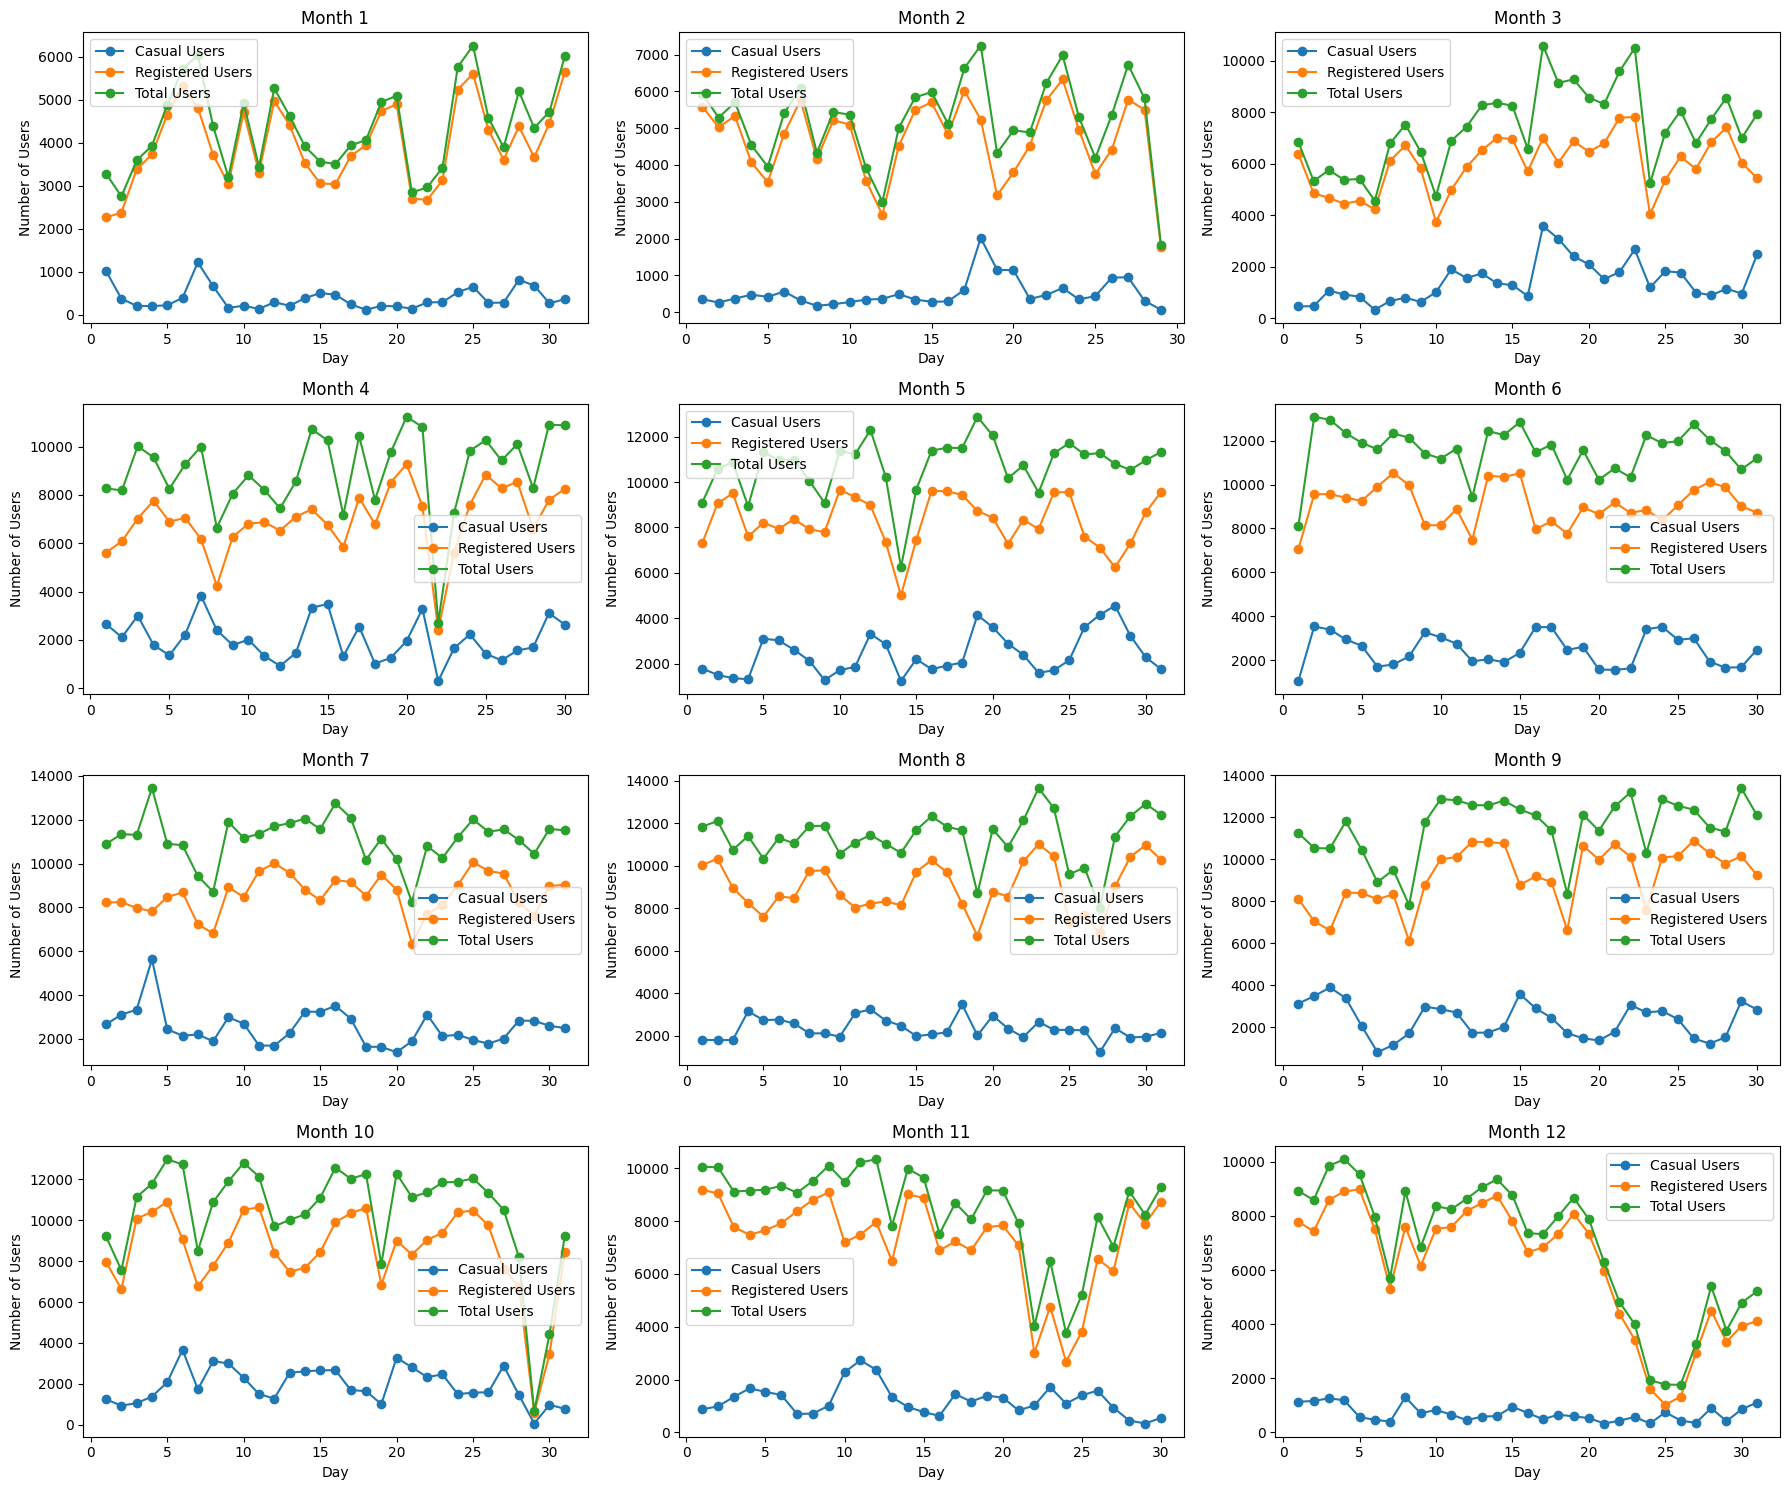

In [173]:
# membuat 12 subplot yang menggambarkan pengguna casual, registered, total setiap harinya untuk 12 bulan berbeda
monthly_data = day_df.groupby(day_df['dteday'].dt.month)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# melakukan iterasi untuk bulan di day_df
for month, data in monthly_data:
    ax = axes[month-1]

    # melakukan grouping date dengan jumlah dari casual, registered dan total
    daily_casual = data.groupby(data['dteday'].dt.day)['casual'].sum()
    daily_registered = data.groupby(data['dteday'].dt.day)['registered'].sum()
    daily_cnt = data.groupby(data['dteday'].dt.day)['cnt'].sum()

    # melakukan plotting untuk setiap jenis usernya
    ax.plot(daily_casual.index, daily_casual.values, label='Casual Users', marker='o')
    ax.plot(daily_registered.index, daily_registered.values, label='Registered Users', marker='o')
    ax.plot(daily_cnt.index, daily_cnt.values, label='Total Users', marker='o')

    # melakukan labeling dan judul
    ax.set_title(f'Month {month}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Users')
    ax.legend()

for i in range(len(monthly_data), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

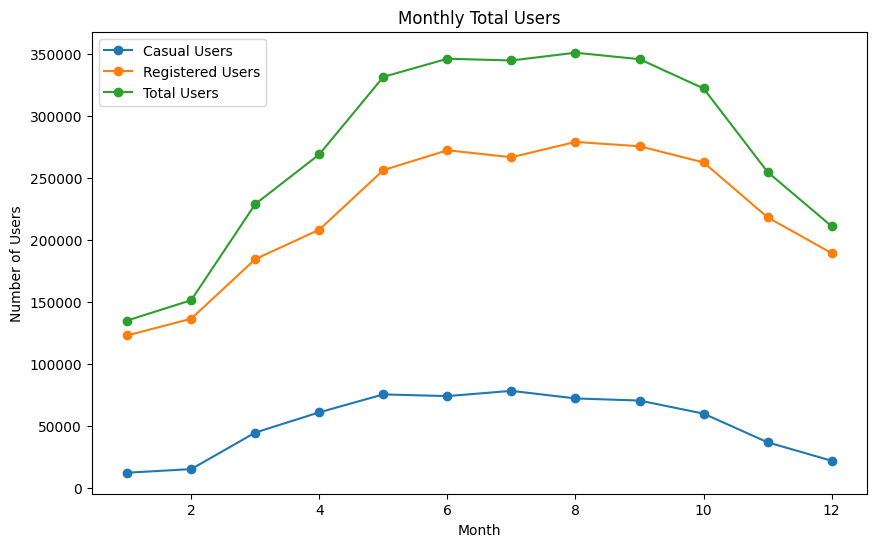

In [174]:
# menampilkan monthly casual, registered dan total

# grouping date dengan jumlah casual, registered, dan total
monthly_casual = day_df.groupby(day_df['dteday'].dt.month)['casual'].sum()
monthly_registered = day_df.groupby(day_df['dteday'].dt.month)['registered'].sum()
monthly_cnt = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()

# melakukan ploting untuk setiap jenis user untuk 3 garis berbeda
plt.figure(figsize=(10, 6))
plt.plot(monthly_casual.index, monthly_casual.values, label='Casual Users', marker='o')
plt.plot(monthly_registered.index, monthly_registered.values, label='Registered Users', marker='o')
plt.plot(monthly_cnt.index, monthly_cnt.values, label='Total Users', marker='o')

# labeling sumbu x dan y serta memberi judul
plt.title('Monthly Total Users')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend()

plt.show()

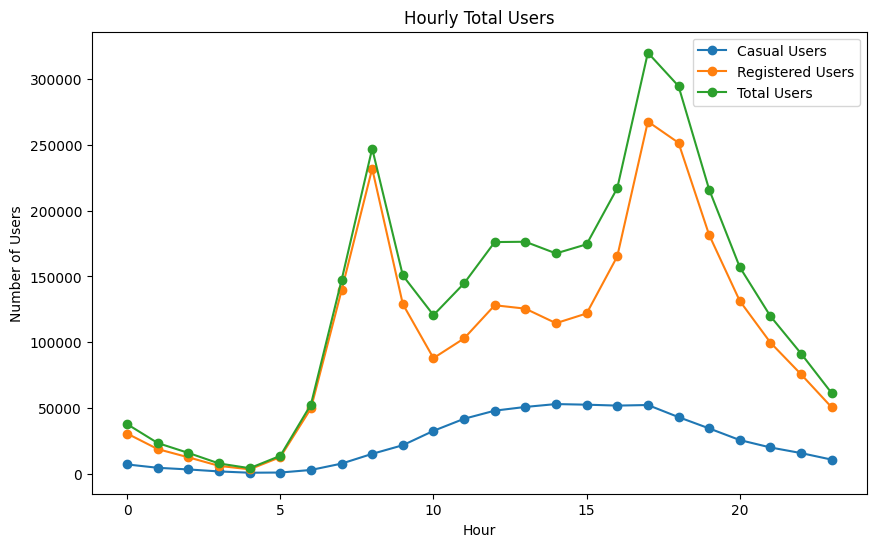

In [175]:
# menampilkan jumlah user pada setiap jamnya

# melakukan grouping user terhadap jumlah casual, registered, dan total
hourly_casual = hour_df.groupby('hr')['casual'].sum()
hourly_registered = hour_df.groupby('hr')['registered'].sum()
hourly_cnt = hour_df.groupby('hr')['cnt'].sum()

# ploting tiap user dengan 3 garis berbeda
plt.figure(figsize=(10, 6))
plt.plot(hourly_casual.index, hourly_casual.values, label='Casual Users', marker='o')
plt.plot(hourly_registered.index, hourly_registered.values, label='Registered Users', marker='o')
plt.plot(hourly_cnt.index, hourly_cnt.values, label='Total Users', marker='o')

# judul dan labeling sumbu x dan y
plt.title('Hourly Total Users')
plt.xlabel('Hour')
plt.ylabel('Number of Users')
plt.legend()

plt.show()

<ipython-input-176-bf8579691229>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_group', y='casual', data=hour_df, ax=axes[0], palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

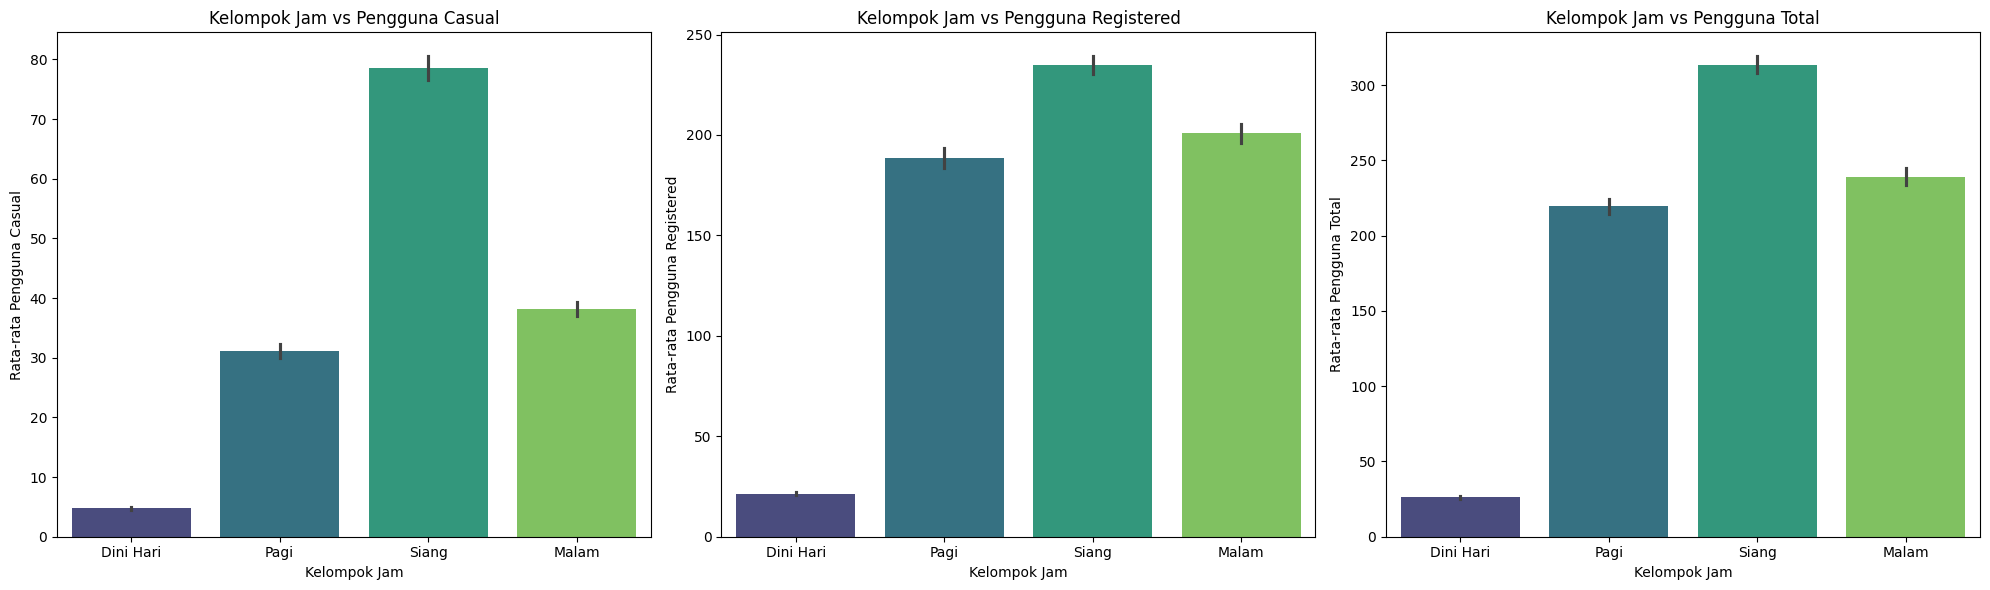

In [176]:
# manual gruping untuk kelompok jam yang berbeda
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Subplot 1: Kelompok Jam vs Pengguna Casual
sns.barplot(x='hour_group', y='casual', data=hour_df, ax=axes[0], palette="viridis")
axes[0].set_title('Kelompok Jam vs Pengguna Casual')
axes[0].set_xlabel('Kelompok Jam')
axes[0].set_ylabel('Rata-rata Pengguna Casual')

# Subplot 2: Kelompok Jam vs Pengguna Registered
sns.barplot(x='hour_group', y='registered', data=hour_df, ax=axes[1], palette="viridis")
axes[1].set_title('Kelompok Jam vs Pengguna Registered')
axes[1].set_xlabel('Kelompok Jam')
axes[1].set_ylabel('Rata-rata Pengguna Registered')

# Subplot 3: Kelompok Jam vs Pengguna Total (cnt)
sns.barplot(x='hour_group', y='cnt', data=hour_df, ax=axes[2], palette="viridis")
axes[2].set_title('Kelompok Jam vs Pengguna Total')
axes[2].set_xlabel('Kelompok Jam')
axes[2].set_ylabel('Rata-rata Pengguna Total')

plt.tight_layout()
plt.show()

Pada grafik diatas, terlihat casual user memiliki user terbanyak pada siang hari yaitu 12 - 17, yang berlaku sama untuk registered dan total. Akan terapi, pada casual, kelompok pagi dan malam mengalami penurunan yang drastis jika dibandingkan dengan kelompok siang

### Pertanyaan 2:Bagaimana faktor eksternal (temperatur, kelembapan, kecepatan angin) memengaruhi jumlah pengguna sepeda?

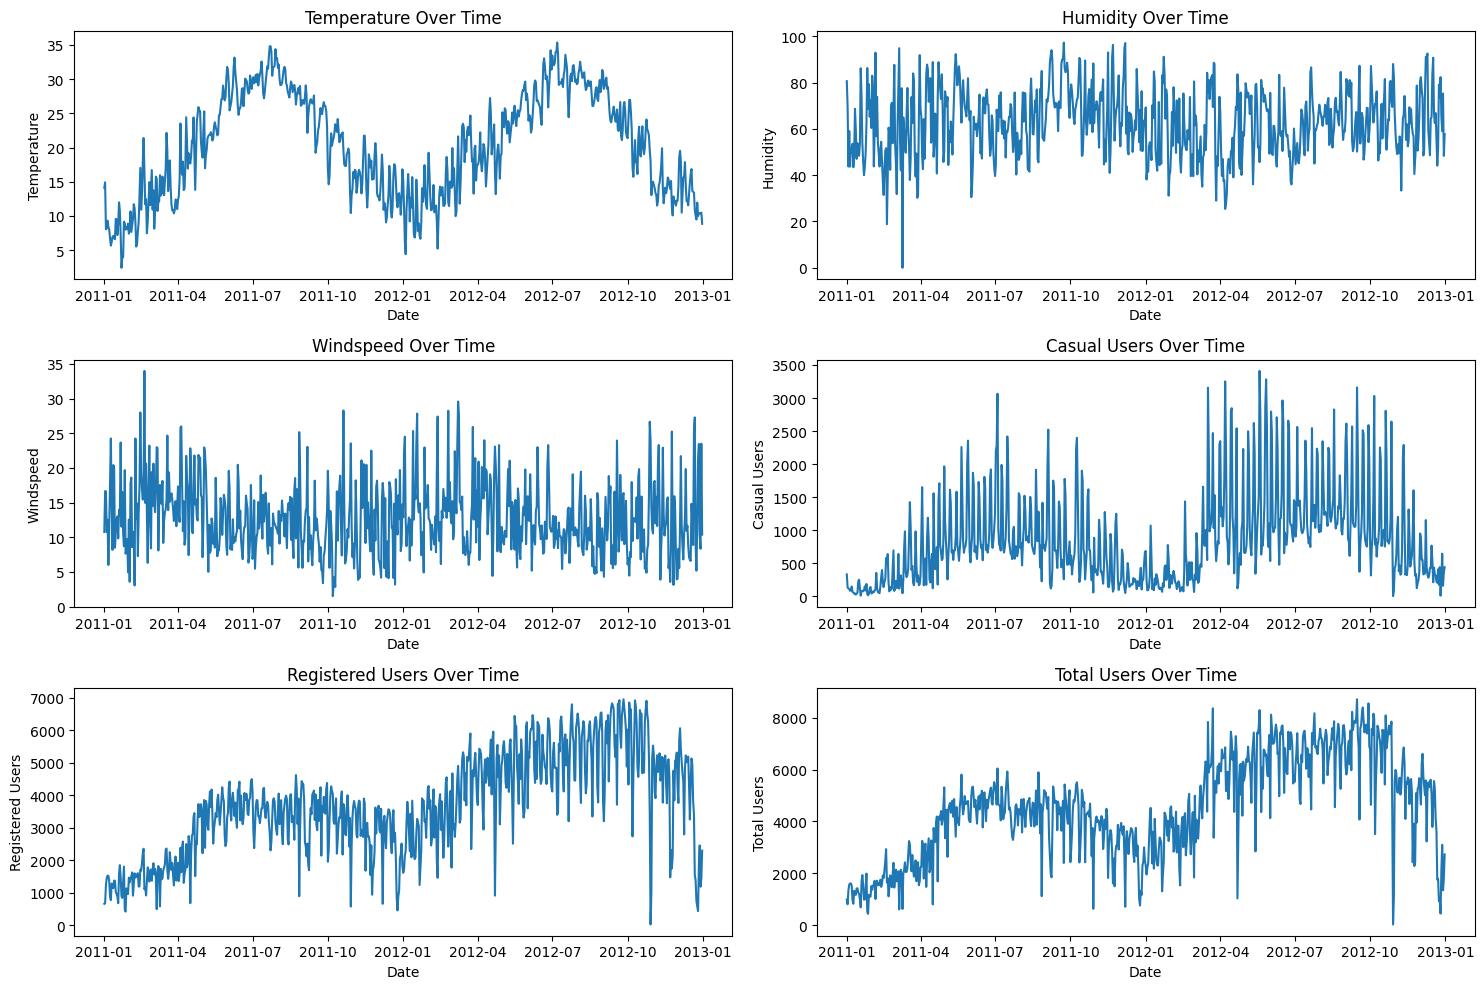

In [177]:
# melihat grafik temperatur, kelembapan, kecepatan angin, casual user, registered user, total user terhadap waktu

plt.figure(figsize=(15, 10))

# ploting temp terhadap waktu
plt.subplot(3, 2, 1)
plt.plot(day_df['dteday'], day_df['temp'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

# ploting hum terhadap waktu
plt.subplot(3, 2, 2)
plt.plot(day_df['dteday'], day_df['hum'])
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')

# ploting kecepatan angin terhadap waktu
plt.subplot(3, 2, 3)
plt.plot(day_df['dteday'], day_df['windspeed'])
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed')

# ploting casual terhadap waktu
plt.subplot(3, 2, 4)
plt.plot(day_df['dteday'], day_df['casual'])
plt.title('Casual Users Over Time')
plt.xlabel('Date')
plt.ylabel('Casual Users')

# ploting registered terhadap waktu
plt.subplot(3, 2, 5)
plt.plot(day_df['dteday'], day_df['registered'])
plt.title('Registered Users Over Time')
plt.xlabel('Date')
plt.ylabel('Registered Users')

# ploting total user terhadap waktu
plt.subplot(3, 2, 6)
plt.plot(day_df['dteday'], day_df['cnt'])
plt.title('Total Users Over Time')
plt.xlabel('Date')
plt.ylabel('Total Users')

plt.tight_layout()
plt.show()


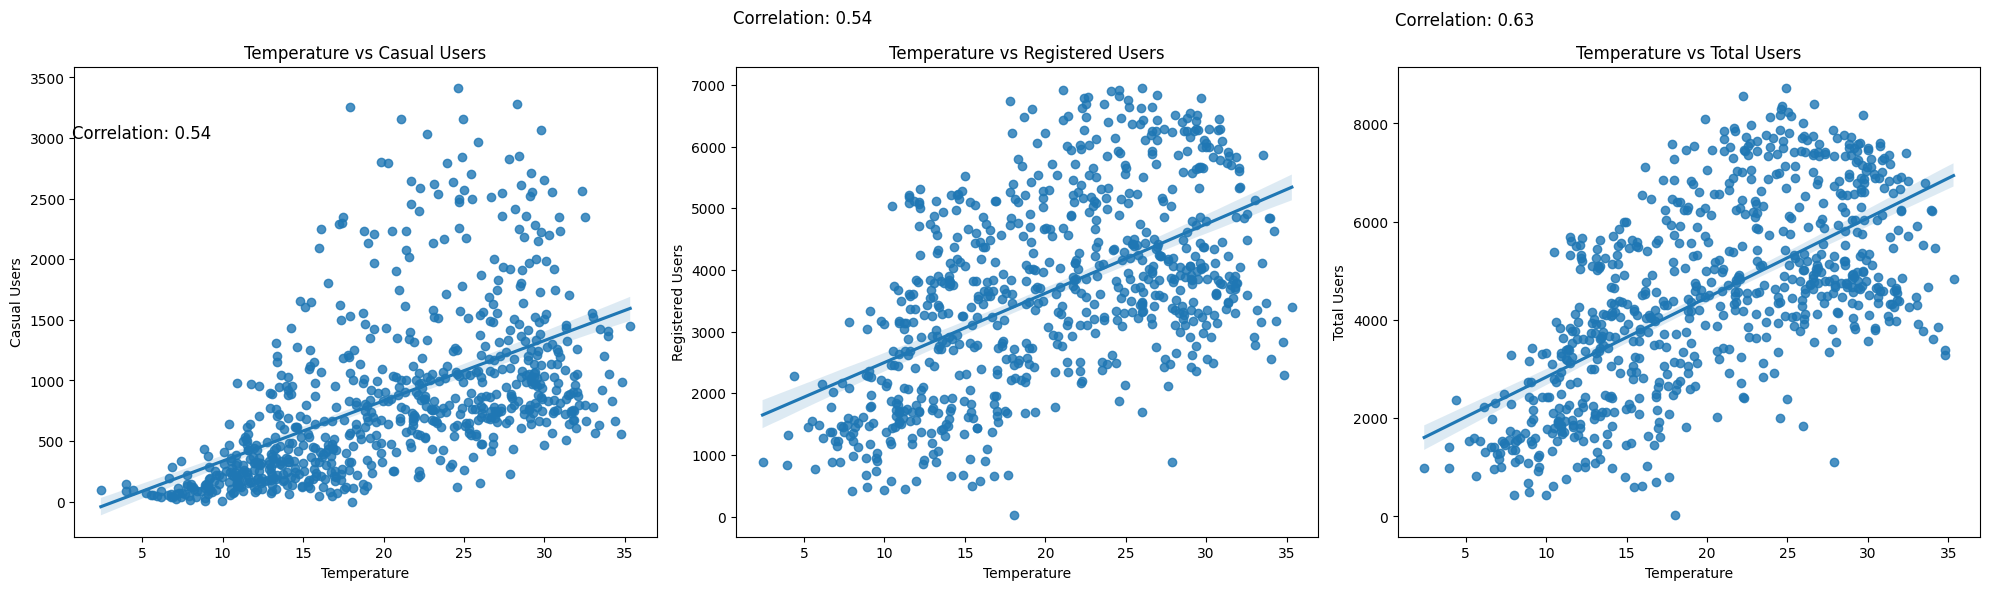

In [178]:
# mencari korelasi antara temperatur terhadap user
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # membuat subplot

# ploting temp terhadap casual
sns.regplot(x='temp', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Temperature vs Casual Users')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Casual Users')
corr = day_df['temp'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)


# ploting temp terhadap registered
sns.regplot(x='temp', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Temperature vs Registered Users')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Registered Users')
corr = day_df['temp'].corr(day_df['registered'])
axes[1].text(0.6, 8000, f'Correlation: {corr:.2f}', fontsize=12)


# ploting temp terhadap total
sns.regplot(x='temp', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Temperature vs Total Users')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Total Users')
corr = day_df['temp'].corr(day_df['cnt'])
axes[2].text(0.6, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

terlihat bahwa korelasi antara user dan temperatur berada di atas 0.5. Ini berarti terdapat hubungan yang lumayan signifikan antar user dengan temperatur. Jika temperatur bertambah, ada kemungkinan bahwa user juga akan bertambah.

<ipython-input-179-b3f055e4ee5e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_casual = day_df.groupby(temp_bins)['casual'].sum()
<ipython-input-179-b3f055e4ee5e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_registered = day_df.groupby(temp_bins)['registered'].sum()
<ipython-input-179-b3f055e4ee5e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cnt = day_df.groupby(temp_bins)['cnt'].sum()


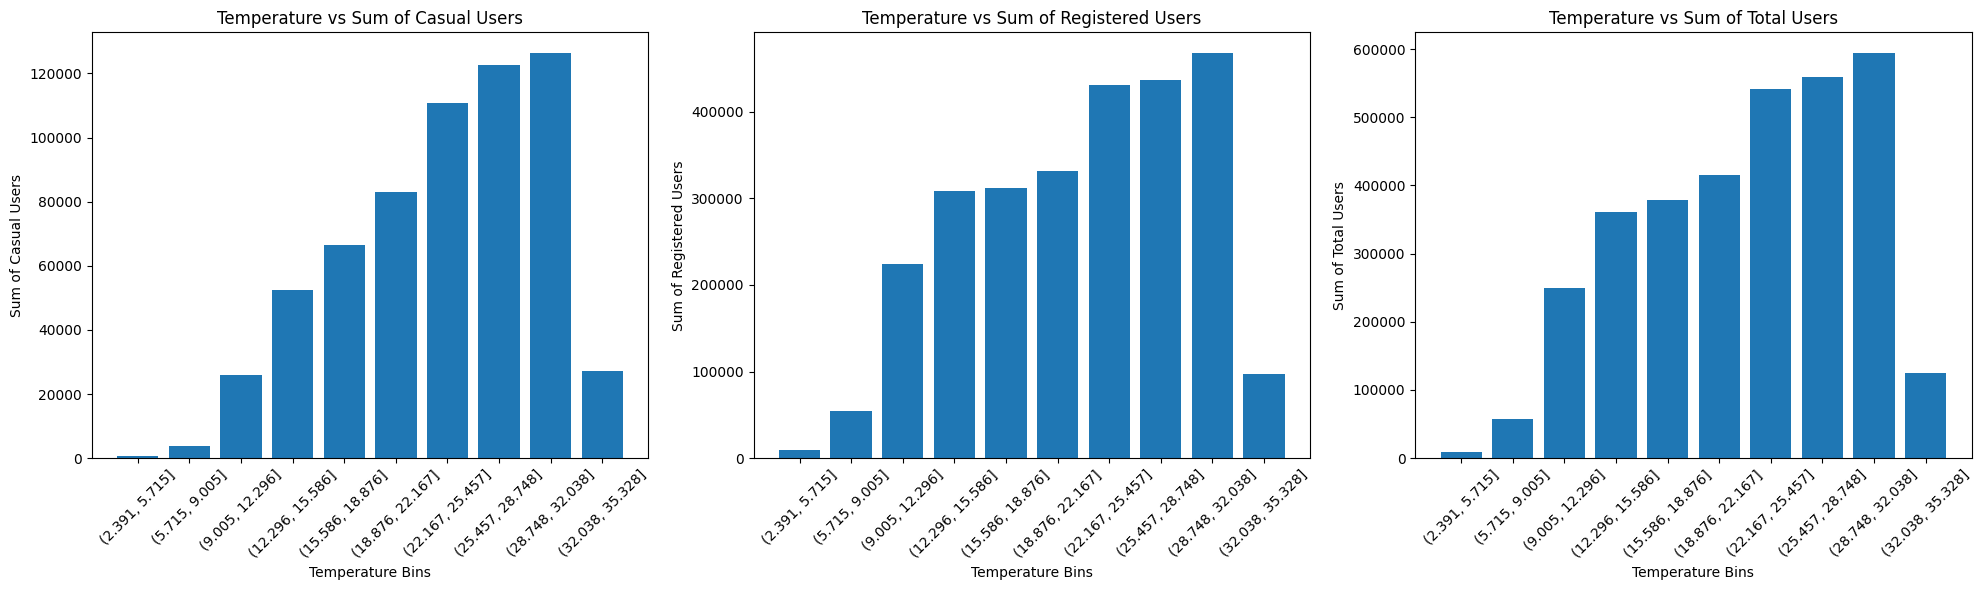

In [179]:
# melihat jumlah user pada setiap selang partisi suhu tertentu
temp_bins = pd.cut(day_df['temp'], bins=10)
temp_casual = day_df.groupby(temp_bins)['casual'].sum()
temp_registered = day_df.groupby(temp_bins)['registered'].sum()
temp_cnt = day_df.groupby(temp_bins)['cnt'].sum()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ploting suhu terhadap casual
axes[0].bar(temp_casual.index.astype(str), temp_casual.values)
axes[0].set_title('Temperature vs Sum of Casual Users')
axes[0].set_xlabel('Temperature Bins')
axes[0].set_ylabel('Sum of Casual Users')
axes[0].tick_params(axis='x', rotation=45)

# ploting suhu terhadap registered
axes[1].bar(temp_registered.index.astype(str), temp_registered.values)
axes[1].set_title('Temperature vs Sum of Registered Users')
axes[1].set_xlabel('Temperature Bins')
axes[1].set_ylabel('Sum of Registered Users')
axes[1].tick_params(axis='x', rotation=45)

# ploting suhu terhadap total
axes[2].bar(temp_cnt.index.astype(str), temp_cnt.values)
axes[2].set_title('Temperature vs Sum of Total Users')
axes[2].set_xlabel('Temperature Bins')
axes[2].set_ylabel('Sum of Total Users')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

grafik di atas menunjukan partisi temperatur yang dibagi ke 10 bagian berbeda dengan masing masing jumlahnya, dengan semuanya memiliki peak di 25.4 - 28.7

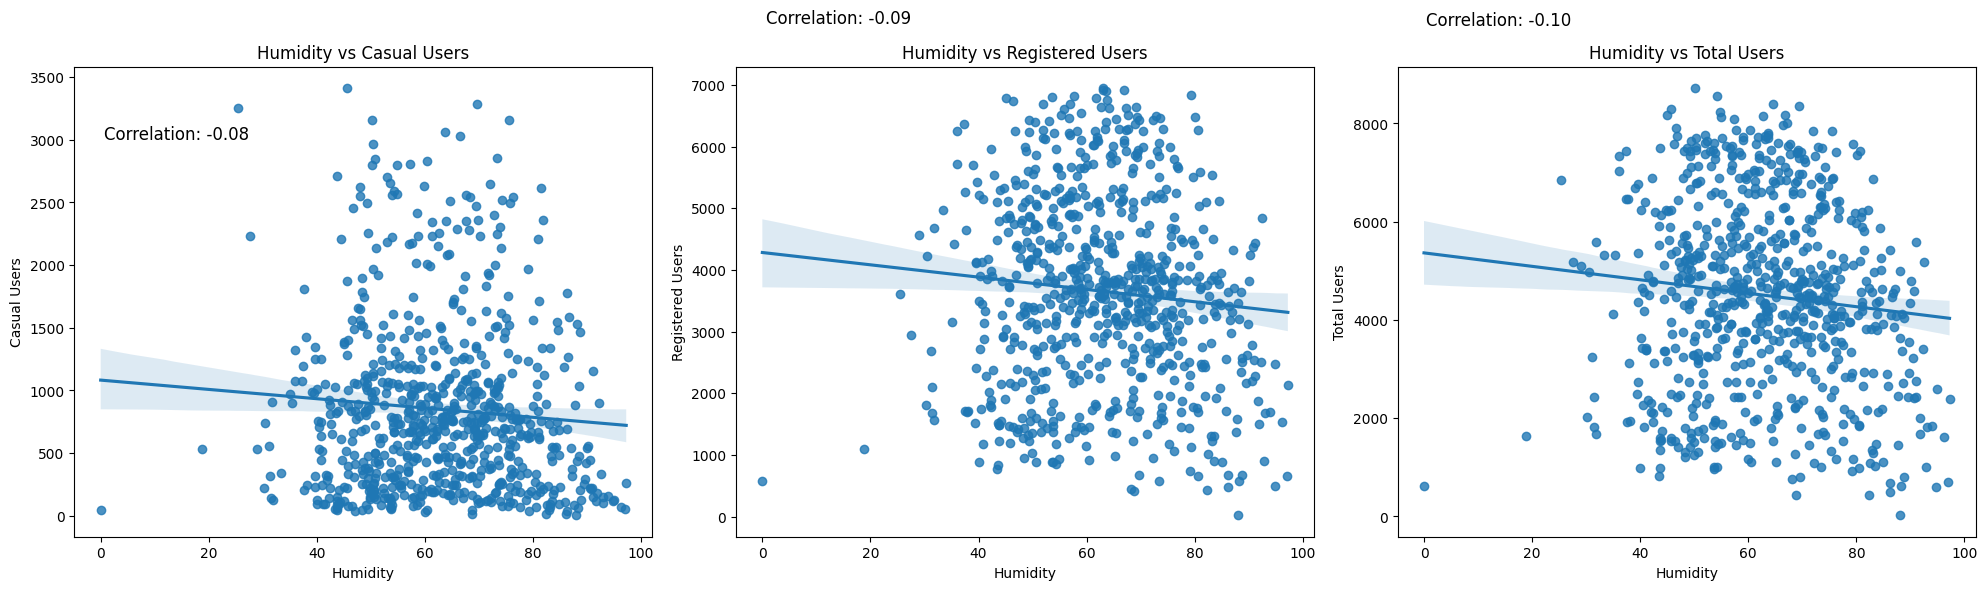

In [180]:
# mencari korealasi antara kelembapan dengan user
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# ploting kelembapan terhadap casual
sns.regplot(x='hum', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Humidity vs Casual Users')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Casual Users')
corr = day_df['hum'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)

# ploting kelembapan terhadap registered
sns.regplot(x='hum', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Humidity vs Registered Users')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Registered Users')
corr = day_df['hum'].corr(day_df['registered'])
axes[1].text(0.6, 8000, f'Correlation: {corr:.2f}', fontsize=12)

# ploting kelembapan terhadap total
sns.regplot(x='hum', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Humidity vs Total Users')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Total Users')
corr = day_df['hum'].corr(day_df['cnt'])
axes[2].text(0.4, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

grafik di atas menunjukan korelasi kelembapan dengan user, karena memiliki nilai korealsi yang mendekati 0, maka dapat disimpulkan tidak ada hubungan yang signifikan antara kelembapan dengan user

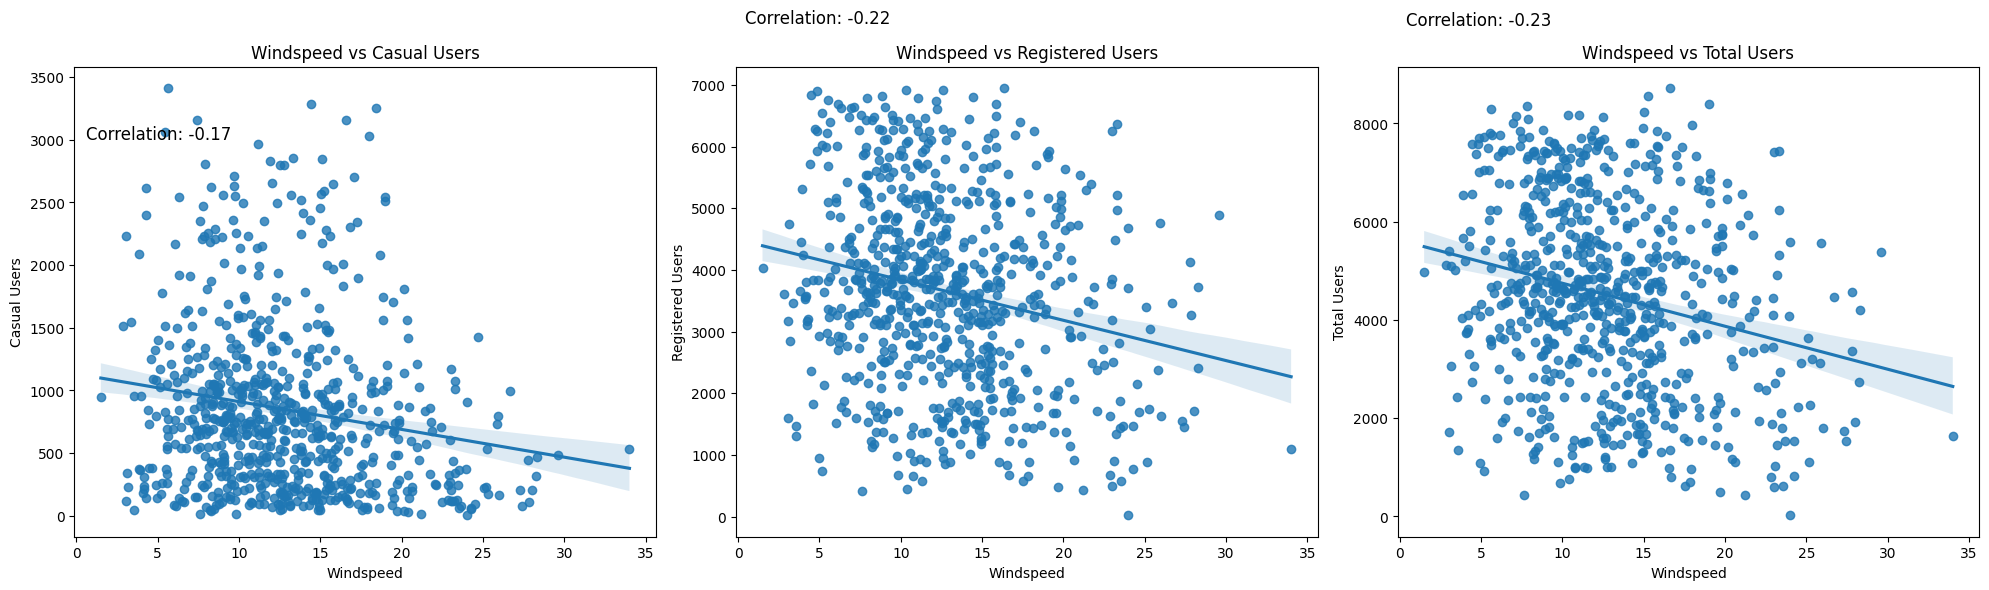

In [181]:
# mencari korelasi antara kecepatan angin dengan user
fig, axes = plt.subplots(1, 3, figsize=(20, 6))


# ploting kecepatan angin terhadap casual
sns.regplot(x='windspeed', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Windspeed vs Casual Users')
axes[0].set_xlabel('Windspeed')
axes[0].set_ylabel('Casual Users')
corr = day_df['windspeed'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)

# ploting kecepatan angin terhadap registered
sns.regplot(x='windspeed', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Windspeed vs Registered Users')
axes[1].set_xlabel('Windspeed')
axes[1].set_ylabel('Registered Users')
corr = day_df['windspeed'].corr(day_df['registered'])
axes[1].text(0.4, 8000, f'Correlation: {corr:.2f}', fontsize=12)

# ploting kecepatan angin terhadap total
sns.regplot(x='windspeed', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Windspeed vs Total Users')
axes[2].set_xlabel('Windspeed')
axes[2].set_ylabel('Total Users')
corr = day_df['windspeed'].corr(day_df['cnt'])
axes[2].text(0.4, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

sama seperti kelembapan, nilai korelasi dari windspeed terhadap user hanya berkisar di -0.2, yang kurang signifikan untuk menjadi korelasi. Dapat disimpulkan bahwa tidak adanya korelasi yang signifikan antara kecepatan udara dengan total user

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

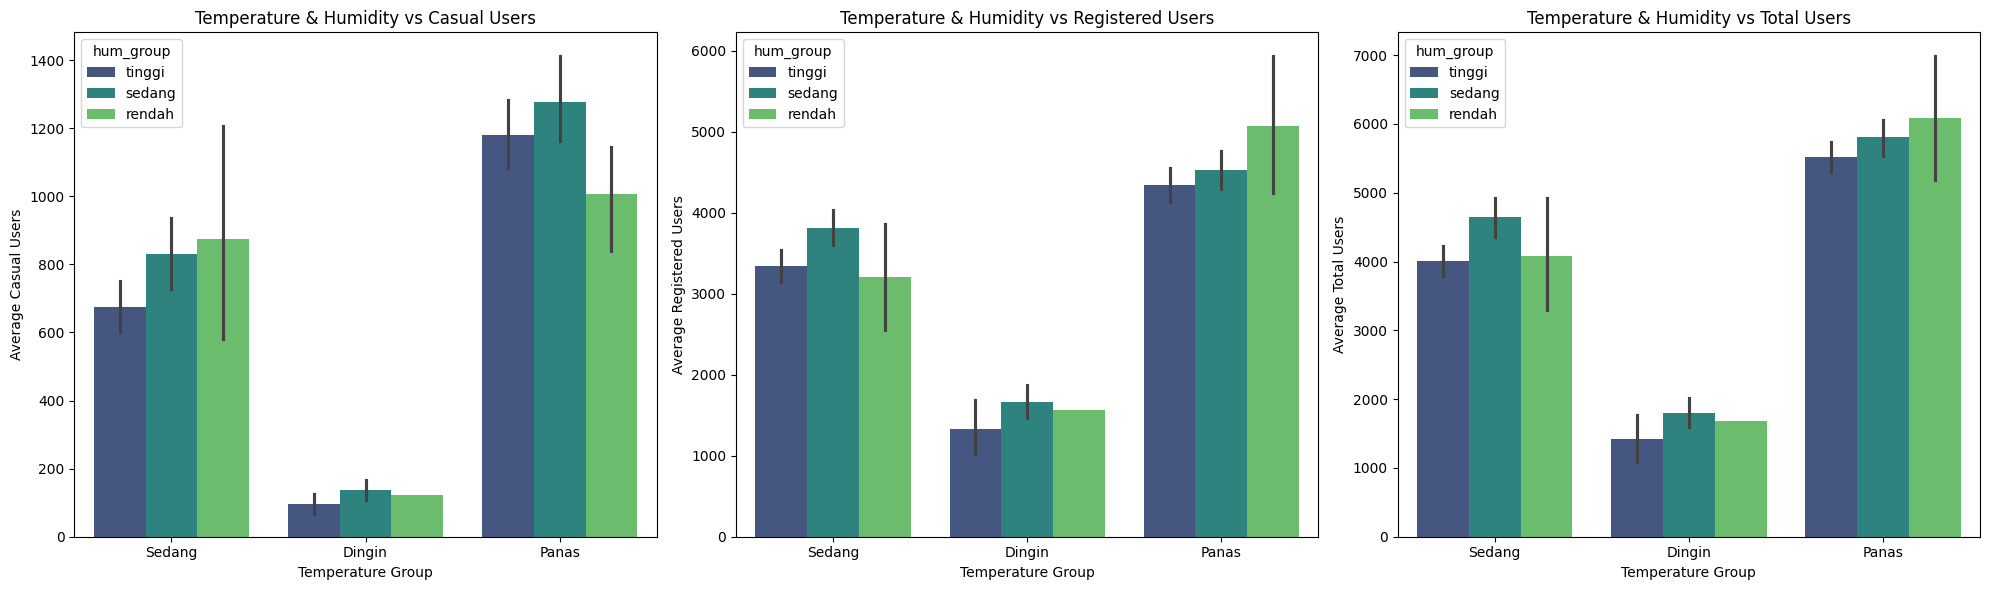

In [182]:
# Manual grouping temperatur dan kelembapan terhadap setiap jenis users
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Subplot 1: Temperature & Humidity vs Casual Users
sns.barplot(x='temp_group', y='casual', hue='hum_group', data=day_df, ax=axes[0], palette="viridis")
axes[0].set_title('Temperature & Humidity vs Casual Users')
axes[0].set_xlabel('Temperature Group')
axes[0].set_ylabel('Average Casual Users')

# Subplot 2: Temperature & Humidity vs Registered Users
sns.barplot(x='temp_group', y='registered', hue='hum_group', data=day_df, ax=axes[1], palette="viridis")
axes[1].set_title('Temperature & Humidity vs Registered Users')
axes[1].set_xlabel('Temperature Group')
axes[1].set_ylabel('Average Registered Users')

# Subplot 3: Temperature & Humidity vs Total Users (cnt)
sns.barplot(x='temp_group', y='cnt', hue='hum_group', data=day_df, ax=axes[2], palette="viridis")
axes[2].set_title('Temperature & Humidity vs Total Users')
axes[2].set_xlabel('Temperature Group')
axes[2].set_ylabel('Average Total Users')

plt.tight_layout()
plt.show()

pada grafik di atas terlihat bahwa casual memiliki jumlah terbanyak ketika suhu panas dan kelembapan yang sedang, yaitu diatas 25 C dengan 40-60% kelembapan. Pada registered mayoritas pada suhu panas dengan kelembapan rendah, yaitu diatas 25 C dan kelembapan dibawah 40%.Dan berlaku hal yang sama untuk total

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

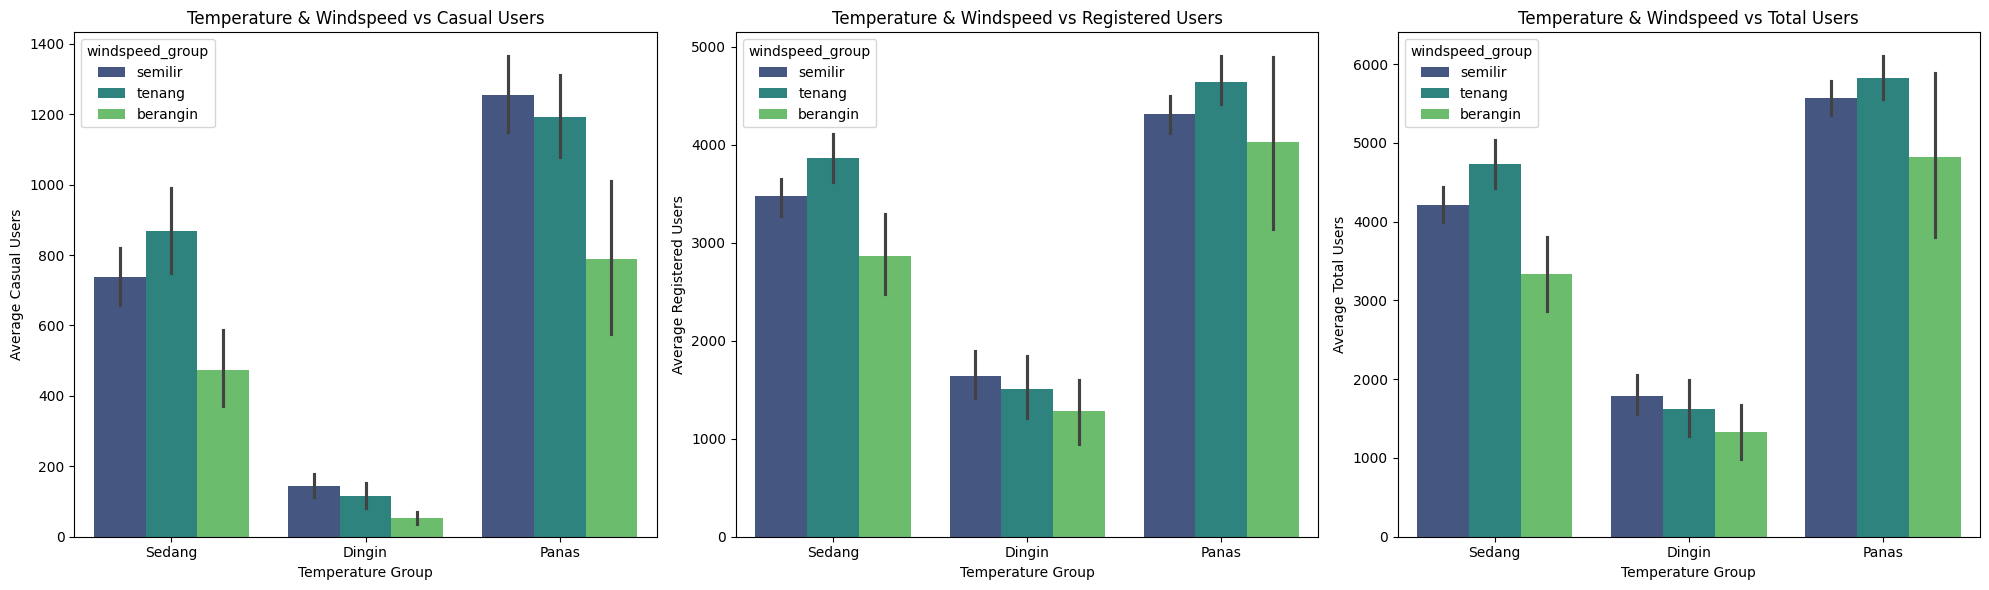

In [183]:
# manual grouping untuk temperatur dan kecepangan angin terhadap setiap users
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Casual Users
sns.barplot(x='temp_group', y='casual', hue='windspeed_group', data=day_df, ax=axes[0], palette="viridis")
axes[0].set_title('Temperature & Windspeed vs Casual Users')
axes[0].set_xlabel('Temperature Group')
axes[0].set_ylabel('Average Casual Users')

# Registered Users
sns.barplot(x='temp_group', y='registered', hue='windspeed_group', data=day_df, ax=axes[1], palette="viridis")
axes[1].set_title('Temperature & Windspeed vs Registered Users')
axes[1].set_xlabel('Temperature Group')
axes[1].set_ylabel('Average Registered Users')

# Total Users
sns.barplot(x='temp_group', y='cnt', hue='windspeed_group', data=day_df, ax=axes[2], palette="viridis")
axes[2].set_title('Temperature & Windspeed vs Total Users')
axes[2].set_xlabel('Temperature Group')
axes[2].set_ylabel('Average Total Users')

plt.tight_layout()
plt.show()

pada grafik di atas terlihat bahwa casual memiliki jumlah terbanyak ketika suhu panas dan kecepatan udara yang semilir, yaitu diatas 25 C dengan 10-20 m/s kecepatan angin. Pada registered mayoritas pada suhu panas dengan kecepatan angin tenang, yaitu diatas 25 C dan kecepatan angin dibawah 10 m/s.Dan berlaku hal yang sama untuk total

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

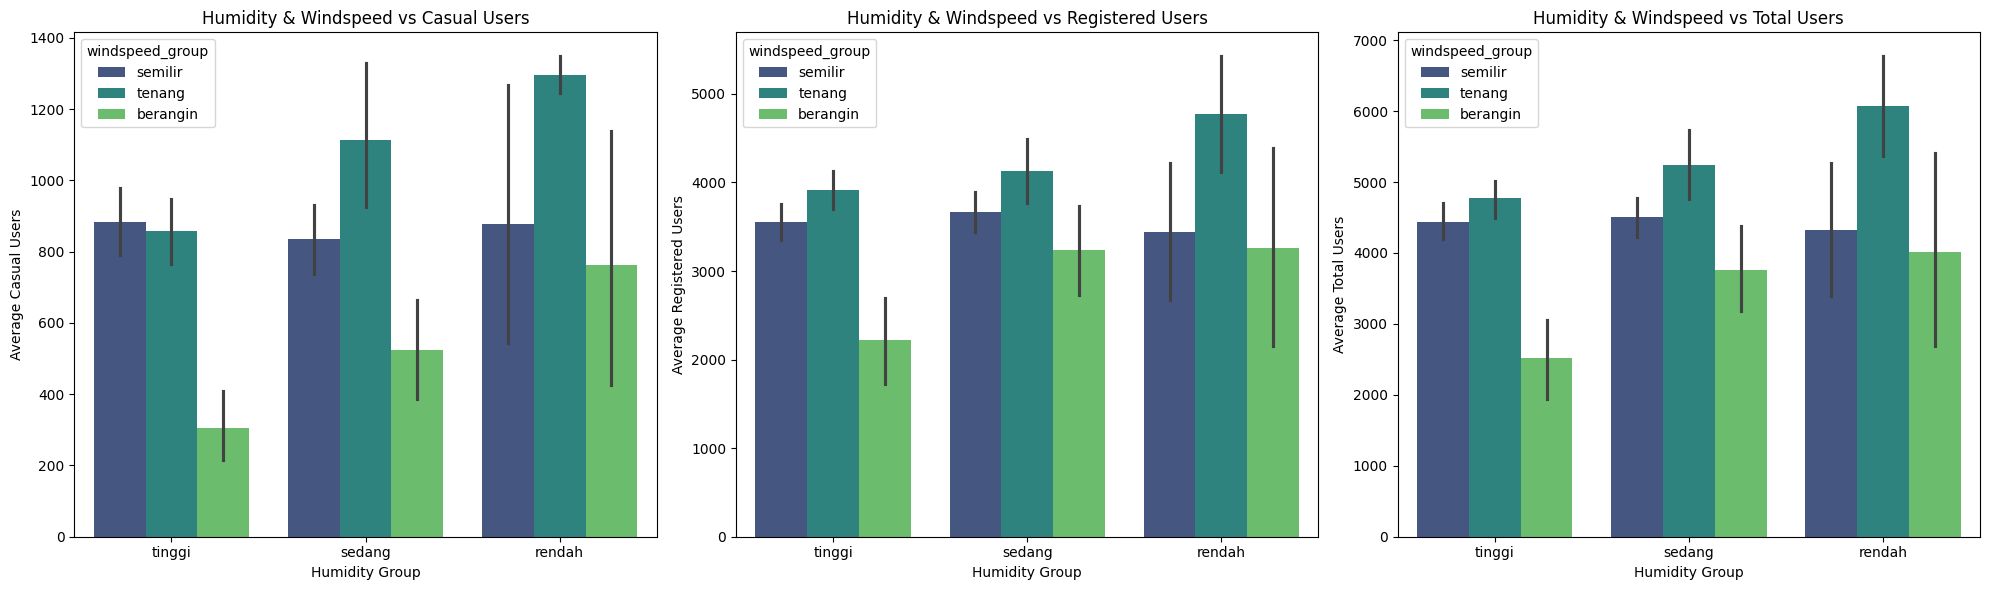

In [184]:
# manual gruping untuk kelembapan dan kecepatan angin terhadap setiap users
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Casual Users
sns.barplot(x='hum_group', y='casual', hue='windspeed_group', data=day_df, ax=axes[0], palette="viridis")
axes[0].set_title('Humidity & Windspeed vs Casual Users')
axes[0].set_xlabel('Humidity Group')
axes[0].set_ylabel('Average Casual Users')

# Registered Users
sns.barplot(x='hum_group', y='registered', hue='windspeed_group', data=day_df, ax=axes[1], palette="viridis")
axes[1].set_title('Humidity & Windspeed vs Registered Users')
axes[1].set_xlabel('Humidity Group')
axes[1].set_ylabel('Average Registered Users')

# Total Users
sns.barplot(x='hum_group', y='cnt', hue='windspeed_group', data=day_df, ax=axes[2], palette="viridis")
axes[2].set_title('Humidity & Windspeed vs Total Users')
axes[2].set_xlabel('Humidity Group')
axes[2].set_ylabel('Average Total Users')

plt.tight_layout()
plt.show()

pada grafik di atas terlihat bahwa casual memiliki jumlah terbanyak ketika kelembapan rendah dan kecepatan udara yang tenang, yaitu dibawah 40% dengan kecepatan angin dibawah 10 m/s. Hal yang sama juga terjadi pada registered dan total

**Insight:**
- Pada pertanyaan pertama, terlihat perilaku tiap pengguna mulai dari pengguna casual, registered dan total pada setiap bulannya. Terlihat ada beberapa poin pada graph yang menunjukan kenaikan pada garis casual dan total, sedangkan registered yang menurun. Ini berarti bahwa pengguna casual lebih tertarik pada waktu-waktu tersebut, hal ini lah yang dapat dimanfaatkan agar pada casual user dapat berubah menjadi registered users.
- Jika dilihat pada chart monthly, maka peak pengguna berada di pertengahan tahun, dan kemudian menurun seiring suhu yang mendingin
- Jika meninjau manual gruping chart hourly, pengguna Semua jenis pengguna memiliki peak pada siang hari yaitu 12-17, tetapi pada casual user terdapat kejomplangan yang cukup jauh antara user siang dengan malam dan pagi. Ini berarti bahwa casual user sangat aktif di siang hari yang dapat dimanfaatkan untuk melakukan sesuatu

$\,$
- Pada pertanyaan kedua, dapat diperoleh bahwa temperatur ada korelasi di sekitar 0.5 - 0.6 an yang berarti bahwa meningkatnya suhu dapat berpengaruh pada peningkatan jumlah total users.
- Dapat terlihat juga bahwa kelembapan dan kecepatan angin bukan merupakan faktor yang memengaruhi jumlah user bike sharing ini.
- Kemudian jika meninjau clustering manual gruping, terlihat bahwa adanya sedikit perbedaan peak antara casual user dengan registered users

## Analisis Lanjutan (Opsional)

In [185]:
day_df.to_csv("day1.csv", index=False)
hour_df.to_csv("hour1.csv", index=False)

## Conclusion

- Ada faktor eksternal yang jelas memengaruhi jumlah pengguna, yaitu temperatur. Semakin tinggi temperatur, semakin banyak juga jumlah pengguna. Akan tetapi, jika temperatur yang terlalu tinggi, maka pengguna akan mulai berkurang. Walaupun ini merupakan faktor eksternal yang tidak dapat diatur, tetapi dapat diantisipasi dengan menambah jumlah sepeda ketika suhu mendukung untuk memaksimalkan revenue atau mengurangi sepeda ketika suhu tidak mendukung untuk mengurangi cost-cost.
- terlihat juga ada beberapa perbedaan kebiasaan antara casual user dengan registered user jika kita melihat hubungan temperatur kelembapan terhadap user pada grafik manual gruping. Promosi dapat dilakukan pada saat peak untuk casual user agar dapat menarik lebih banyak user.

$\,$
- Terlihat bahwa ada beberapa hari dalam satu tahun dimana terjadi lonjakan casual users. Hal ini dapat dimanfaatkan untuk mengajak pada casual users agar dapat mendaftar dan menjadi registered users.
- Pada clustering hourly chart juga terlihat peningkatan casual users siang hari, yaitu pukul 12-17 ini berarti promosi atau acara dapat dilaksanakan di pertengahan hari untuk menarik lebih banyak casual users dan nantinya semoga dapat menjadikannya menjadi registered users.